# BIG DATA STORAGE PROJECT

In this project we will load raw data from three different file types and store in a database

# Import the necessary libraries

In [1]:
import urllib.request, urllib.parse, urllib.error
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import requests
from bs4 import BeautifulSoup

# Download the files and get a sense of the data

In [3]:
# First we'll start with the API
url = "https://www.cheapshark.com/api/1.0/deals?upperPrice=50"

In [4]:
# Put request into api and return data, decode it, and then use json loads to read the string in as a list of dictionaries.
uh = urllib.request.urlopen(url)
data = uh.read().decode()
x = json.loads(data)
print(data)

[{"internalName":"GODSWILLFALL","title":"Gods Will Fall","metacriticLink":"\/game\/pc\/gods-will-fall","dealID":"pute8kUEu3BRI75%2FFIoV4pB4hb%2Bi9L9sxQ0rtPJwg2Q%3D","storeID":"25","gameID":"223382","salePrice":"0.00","normalPrice":"24.99","isOnSale":"1","savings":"100.000000","metacriticScore":"70","steamRatingText":"Mixed","steamRatingPercent":"48","steamRatingCount":"33","steamAppID":"1243690","releaseDate":1611878400,"lastChange":1641489880,"dealRating":"10.0","thumb":"https:\/\/cdn.cloudflare.steamstatic.com\/steam\/apps\/1243690\/capsule_sm_120.jpg?t=1630396676"},{"internalName":"TANKWARFARETUNISIA1943COMPLETEEDITION","title":"Tank Warfare: Tunisia 1943 Complete Edition","metacriticLink":null,"dealID":"0jp%2FBczfw6vyekiKenwesDWt00fuHUj8gjXkBhQtykM%3D","storeID":"2","gameID":"195526","salePrice":"5.54","normalPrice":"73.90","isOnSale":"1","savings":"92.503383","metacriticScore":"0","steamRatingText":null,"steamRatingPercent":"0","steamRatingCount":"0","steamAppID":null,"releaseDate

In [5]:
# I want to take a look at what the data looks like, so I'm going to use a for loop to print out one games info.
y = x[0]
for k,v in y.items():
    print("{}: {}".format(k,v))

internalName: GODSWILLFALL
title: Gods Will Fall
metacriticLink: /game/pc/gods-will-fall
dealID: pute8kUEu3BRI75%2FFIoV4pB4hb%2Bi9L9sxQ0rtPJwg2Q%3D
storeID: 25
gameID: 223382
salePrice: 0.00
normalPrice: 24.99
isOnSale: 1
savings: 100.000000
metacriticScore: 70
steamRatingText: Mixed
steamRatingPercent: 48
steamRatingCount: 33
steamAppID: 1243690
releaseDate: 1611878400
lastChange: 1641489880
dealRating: 10.0
thumb: https://cdn.cloudflare.steamstatic.com/steam/apps/1243690/capsule_sm_120.jpg?t=1630396676


In [6]:
# OK. It's looking good. Not really what I wanted, but i'll work with it. Time to turn it into a pandas dataframe.
df = pd.DataFrame(x)
df

,internalName,title,metacriticLink,dealID,storeID,gameID,salePrice,normalPrice,isOnSale,savings,metacriticScore,steamRatingText,steamRatingPercent,steamRatingCount,steamAppID,releaseDate,lastChange,dealRating,thumb
0,GODSWILLFALL,Gods Will Fall,/game/pc/gods-will-fall,pute8kUEu3BRI75%2FFIoV4pB4hb%2Bi9L9sxQ0rtPJwg2...,25,223382,0.00,24.99,1,100.000000,70,Mixed,48,33,1243690,1611878400,1641489880,10.0,https://cdn.cloudflare.steamstatic.com/steam/a...
1,TANKWARFARETUNISIA1943COMPLETEEDITION,Tank Warfare: Tunisia 1943 Complete Edition,None,0jp%2FBczfw6vyekiKenwesDWt00fuHUj8gjXkBhQtykM%3D,2,195526,5.54,73.90,1,92.503383,0,None,0,0,None,0,1641168197,10.0,https://gamersgatep.imgix.net/8/8/c/6a3503fc7b...
2,JUMPFORCEDELUXEEDITION,JUMP FORCE - Deluxe Edition,None,BAUzXLXFoZLmfiJYPwhuk25EVaI2hzzqDjnNMk7Naio%3D,11,195192,9.89,89.99,1,89.009890,0,None,0,0,None,0,1641262432,10.0,https://images.greenmangaming.com/c8466c85b53a...
3,ONEPIECEBURNINGBLOODGOLDEDITION,ONE PIECE BURNING BLOOD GOLD EDITION,/game/pc/one-piece-burning-blood---gold-edition,s3vx%2Br4Bs1j1qeOuDjgSF2GHss81RwXP5H%2FgCr6gaG...,11,157072,11.24,74.99,1,85.011335,0,None,0,0,None,1472688000,1641236415,10.0,https://images.greenmangaming.com/de83e6c99ef1...
4,ONEPUNCHMANAHERONOBODYKNOWSDELUXEEDITION,One Punch Man: A Hero Nobody Knows Deluxe Edition,None,5iBdHSHea%2F%2FCU3Sb8EbapQE%2B1uFzLQ9D5AqvOPQe...,11,210040,12.79,79.99,1,84.010501,0,None,0,0,None,0,1641262428,10.0,https://hb.imgix.net/4a1afee0d4028c3ed38b74aa5...
5,HOMEWORLDDESERTSOFKHARAKDELUXEEDITION,Homeworld: Deserts of Kharak Deluxe Edition,None,oh2co7oKxzFnJjdSR9QWBCUpejcj1I4Gl37NS4hwtLY%3D,32,170588,6.94,69.37,1,89.995675,0,None,0,0,None,0,1640842086,10.0,https://www.wingamestore.com/images_boxshots/m...
6,HOMEWORLDDESERTSOFKHARAKDELUXEEDITION,Homeworld: Deserts of Kharak Deluxe Edition,None,gUsUzGgADsRnVlcHvDxr8%2BFKAC%2FXNyCh9IizW2FPI%...,29,170588,6.94,69.37,1,89.995675,0,None,0,0,None,0,1640861206,10.0,https://www.wingamestore.com/images_boxshots/m...
7,DRAGONBALLFIGHTERZFIGHTERZEDITION,Dragon Ball Fighter Z FighterZ Edition,None,0cB8snrNQRgQ7dFFOent0o0l3sC5EUy4D0uQEazVZtA%3D,11,174472,14.24,94.98,1,85.007370,0,None,0,0,None,0,1641236329,10.0,https://images.greenmangaming.com/1aaa5e509b07...
8,JUMPFORCEULTIMATEEDITION,JUMP FORCE - Ultimate Edition,None,1vglT1lvFsaenb2LXt0OrGdJkHQslpEYH%2FkI2tABvS0%3D,11,195191,14.99,99.99,1,85.008501,0,None,0,0,None,0,1641236261,10.0,https://images.greenmangaming.com/97bb8a588c7f...
9,DRAGONBALLFIGHTERZULTIMATEEDITION,Dragon Ball Fighter Z Ultimate Edition,None,ur3Mlk%2BM0lSksHh59YdHcWZZVfp4CSKUzvwPnClujyM%3D,11,174473,19.79,109.97,1,82.004183,0,None,0,0,None,0,1641236235,9.8,https://images.greenmangaming.com/33077208537a...


In [7]:
# Drop the unnecessary columns
games = df.drop(columns=['internalName', 'metacriticLink', 'dealID', 'storeID', 'lastChange', 'thumb', 'steamAppID',
                        'releaseDate', 'isOnSale'])
games.head()

,title,gameID,salePrice,normalPrice,savings,metacriticScore,steamRatingText,steamRatingPercent,steamRatingCount,dealRating
0,Gods Will Fall,223382,0.00,24.99,100.000000,70,Mixed,48,33,10.0
1,Tank Warfare: Tunisia 1943 Complete Edition,195526,5.54,73.90,92.503383,0,None,0,0,10.0
2,JUMP FORCE - Deluxe Edition,195192,9.89,89.99,89.009890,0,None,0,0,10.0
3,ONE PIECE BURNING BLOOD GOLD EDITION,157072,11.24,74.99,85.011335,0,None,0,0,10.0
4,One Punch Man: A Hero Nobody Knows Deluxe Edition,210040,12.79,79.99,84.010501,0,None,0,0,10.0


In [8]:
# Check for duplicates
print(any(games.duplicated()))

True


In [9]:
# Drop duplicate rows based on App and Content Rating categories as there might be apps that have different 
# content ratings for install
apps_nodups = games.drop_duplicates(subset=['title', 'gameID'], keep='first')
apps_nodups

,title,gameID,salePrice,normalPrice,savings,metacriticScore,steamRatingText,steamRatingPercent,steamRatingCount,dealRating
0,Gods Will Fall,223382,0.00,24.99,100.000000,70,Mixed,48,33,10.0
1,Tank Warfare: Tunisia 1943 Complete Edition,195526,5.54,73.90,92.503383,0,None,0,0,10.0
2,JUMP FORCE - Deluxe Edition,195192,9.89,89.99,89.009890,0,None,0,0,10.0
3,ONE PIECE BURNING BLOOD GOLD EDITION,157072,11.24,74.99,85.011335,0,None,0,0,10.0
4,One Punch Man: A Hero Nobody Knows Deluxe Edition,210040,12.79,79.99,84.010501,0,None,0,0,10.0
5,Homeworld: Deserts of Kharak Deluxe Edition,170588,6.94,69.37,89.995675,0,None,0,0,10.0
7,Dragon Ball Fighter Z FighterZ Edition,174472,14.24,94.98,85.007370,0,None,0,0,10.0
8,JUMP FORCE - Ultimate Edition,195191,14.99,99.99,85.008501,0,None,0,0,10.0
9,Dragon Ball Fighter Z Ultimate Edition,174473,19.79,109.97,82.004183,0,None,0,0,9.8
10,The Crew 2 Gold Edition,172258,15.48,89.99,82.798089,0,None,0,0,9.6


In [10]:
# Check for duplicates
print(any(apps_nodups.duplicated()))

False


In [11]:
# Find columns with NaN values
for col in apps_nodups.columns:
    miss = apps_nodups[col].isnull().sum()
    if miss>0:
        print("{} has {} missing values(s)".format(col, miss))

steamRatingText has 19 missing values(s)


In [12]:
# The steamRatingText column is not a critical variable in my dataset, so I'm choosing to leave it in even though it has 
# a number of missing values.

# Change all string values in the dataframe to lowercase
games_lower = apps_nodups.apply(lambda x: x.astype(str).str.lower())
games_lower.head()

,title,gameID,salePrice,normalPrice,savings,metacriticScore,steamRatingText,steamRatingPercent,steamRatingCount,dealRating
0,gods will fall,223382,0.00,24.99,100.000000,70,mixed,48,33,10.0
1,tank warfare: tunisia 1943 complete edition,195526,5.54,73.90,92.503383,0,nan,0,0,10.0
2,jump force - deluxe edition,195192,9.89,89.99,89.009890,0,nan,0,0,10.0
3,one piece burning blood gold edition,157072,11.24,74.99,85.011335,0,nan,0,0,10.0
4,one punch man: a hero nobody knows deluxe edition,210040,12.79,79.99,84.010501,0,nan,0,0,10.0


In [13]:
# I want to round the savings column to an integer because it is a percent value
games_lower['savings'].round(0).astype(int)
games_lower.head()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable rint method

In [14]:
# Guess I need to address the types of my columns
games_lower.dtypes

title                 object
gameID                object
salePrice             object
normalPrice           object
savings               object
metacriticScore       object
steamRatingText       object
steamRatingPercent    object
steamRatingCount      object
dealRating            object
dtype: object

In [15]:
# Assign all the number columns to numeric  
games_lower['salePrice'] = pd.to_numeric(games_lower['salePrice'])
games_lower['normalPrice'] = pd.to_numeric(games_lower['normalPrice'])
games_lower['savings'] = pd.to_numeric(games_lower['savings'])
games_lower['metacriticScore'] = pd.to_numeric(games_lower['metacriticScore'])
games_lower['steamRatingPercent'] = pd.to_numeric(games_lower['steamRatingPercent'])
games_lower['steamRatingCount'] = pd.to_numeric(games_lower['steamRatingCount'])
games_lower['dealRating'] = pd.to_numeric(games_lower['dealRating'])
games_lower.dtypes

title                  object
gameID                 object
salePrice             float64
normalPrice           float64
savings               float64
metacriticScore         int64
steamRatingText        object
steamRatingPercent      int64
steamRatingCount        int64
dealRating            float64
dtype: object

In [16]:
# Now round out the savings to a whole percentage 
games_lower['savings'] = games_lower['savings'].round(0).astype(int)
games_lower.head()

,title,gameID,salePrice,normalPrice,savings,metacriticScore,steamRatingText,steamRatingPercent,steamRatingCount,dealRating
0,gods will fall,223382,0.00,24.99,100,70,mixed,48,33,10.0
1,tank warfare: tunisia 1943 complete edition,195526,5.54,73.90,93,0,nan,0,0,10.0
2,jump force - deluxe edition,195192,9.89,89.99,89,0,nan,0,0,10.0
3,one piece burning blood gold edition,157072,11.24,74.99,85,0,nan,0,0,10.0
4,one punch man: a hero nobody knows deluxe edition,210040,12.79,79.99,84,0,nan,0,0,10.0


In [17]:
# Change column headers
game_deals = games_lower.rename(columns={"title": "game", "gameID": "cheapshark id", "salePrice": "sale price", 
                                         "normalPrice": "reg price", "savings": "percent savings", 
                                         "metacriticScore": "critic score", "steamRatingText": "rating disposition", 
                                         "steamRatingPercent": "steam rating", "steamRatingCount": "steam num reviews",
                                         "dealRating": "deal rating"})
game_deals.head()

,game,cheapshark id,sale price,reg price,percent savings,critic score,rating disposition,steam rating,steam num reviews,deal rating
0,gods will fall,223382,0.00,24.99,100,70,mixed,48,33,10.0
1,tank warfare: tunisia 1943 complete edition,195526,5.54,73.90,93,0,nan,0,0,10.0
2,jump force - deluxe edition,195192,9.89,89.99,89,0,nan,0,0,10.0
3,one piece burning blood gold edition,157072,11.24,74.99,85,0,nan,0,0,10.0
4,one punch man: a hero nobody knows deluxe edition,210040,12.79,79.99,84,0,nan,0,0,10.0


In [18]:
game_deals.to_csv('game_deals.csv')

In [20]:
# Read in csv file
df = pd.read_csv("icon.csv")
df

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
1,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
2,4.5,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device
3,4.4,Paper flowers instructions,ART_AND_DESIGN,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
4,3.8,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,NaN,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10819,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
10820,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10821,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up


In [21]:
# Create a subset of the dataframe that contains only observation that the Category is equal to GAME
df_webgames = df[df['Category']=='GAME']
df_webgames

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1634,4.5,ROBLOX,GAME,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
1635,4.5,Subway Surfers,GAME,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,12-Jul-18,1.90.0,4.1 and up
1636,4.4,Candy Crush Saga,GAME,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,05-Jul-18,1.129.0.2,4.1 and up
1637,4.7,Solitaire,GAME,254258,23M,"10,000,000+",Free,0,Everyone,Card,01-Aug-18,2.137.0,4.1 and up
1638,4.5,Bubble Shooter,GAME,148897,46M,"10,000,000+",Free,0,Everyone,Casual,17-Jul-18,1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,4.0,Winter Wonderland,GAME,1287,38M,"50,000+",Free,0,Everyone,Word,18-Dec-13,1,2.2 and up
10772,4.2,Soccer Clubs Logo Quiz,GAME,21661,16M,"1,000,000+",Free,0,Everyone,Trivia,24-May-18,1.3.81,4.0 and up
10773,4.4,Sid Story,GAME,28510,78M,"500,000+",Free,0,Teen,Card,01-Aug-18,2.6.6,4.0.3 and up
10783,4.3,Fatal Raid - No.1 Mobile FPS,GAME,56496,81M,"1,000,000+",Free,0,Teen,Action,07-Aug-18,1.5.447,4.0 and up


In [22]:
# Drop the unnecessary columns
df_webgames = df_webgames.drop(columns=['Size', 'Type', 'Last Updated', 'Current Ver', 'Android Ver'])
df_webgames

,Rating,App,Category,Reviews,Installs,Price,Content Rating,Genres
1634,4.5,ROBLOX,GAME,4447388,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure
1635,4.5,Subway Surfers,GAME,27722264,"1,000,000,000+",0,Everyone 10+,Arcade
1636,4.4,Candy Crush Saga,GAME,22426677,"500,000,000+",0,Everyone,Casual
1637,4.7,Solitaire,GAME,254258,"10,000,000+",0,Everyone,Card
1638,4.5,Bubble Shooter,GAME,148897,"10,000,000+",0,Everyone,Casual
...,...,...,...,...,...,...,...,...
10771,4.0,Winter Wonderland,GAME,1287,"50,000+",0,Everyone,Word
10772,4.2,Soccer Clubs Logo Quiz,GAME,21661,"1,000,000+",0,Everyone,Trivia
10773,4.4,Sid Story,GAME,28510,"500,000+",0,Teen,Card
10783,4.3,Fatal Raid - No.1 Mobile FPS,GAME,56496,"1,000,000+",0,Teen,Action


In [23]:
# Check for duplicates using the App column since it is the most unique identifier in the data set
print(any(df_webgames.duplicated()))

True


In [24]:
# Drop duplicate rows based on App and Content Rating categories as there might be apps that have different 
# content ratings for install
games_nodups = df_webgames.drop_duplicates(subset=['App', 'Content Rating'], keep='first')
games_nodups

,Rating,App,Category,Reviews,Installs,Price,Content Rating,Genres
1634,4.5,ROBLOX,GAME,4447388,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure
1635,4.5,Subway Surfers,GAME,27722264,"1,000,000,000+",0,Everyone 10+,Arcade
1636,4.4,Candy Crush Saga,GAME,22426677,"500,000,000+",0,Everyone,Casual
1637,4.7,Solitaire,GAME,254258,"10,000,000+",0,Everyone,Card
1638,4.5,Bubble Shooter,GAME,148897,"10,000,000+",0,Everyone,Casual
...,...,...,...,...,...,...,...,...
10771,4.0,Winter Wonderland,GAME,1287,"50,000+",0,Everyone,Word
10772,4.2,Soccer Clubs Logo Quiz,GAME,21661,"1,000,000+",0,Everyone,Trivia
10773,4.4,Sid Story,GAME,28510,"500,000+",0,Teen,Card
10783,4.3,Fatal Raid - No.1 Mobile FPS,GAME,56496,"1,000,000+",0,Teen,Action


In [25]:
# We can see that there were 184 observations removed. Now check that there are no other dups
print(any(games_nodups.duplicated()))

False


In [26]:
# Find columns with NaN values
for col in games_nodups.columns:
    miss = games_nodups[col].isnull().sum()
    if miss>0:
        print("{} has {} missing values(s)".format(col, miss))

Rating has 47 missing values(s)


In [27]:
# Since Rating is an important category for this project, I'm choosing to remove an observations that have no rating
games_without_Nans = games_nodups[np.isfinite(games_nodups['Rating'])] 
games_without_Nans

,Rating,App,Category,Reviews,Installs,Price,Content Rating,Genres
1634,4.5,ROBLOX,GAME,4447388,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure
1635,4.5,Subway Surfers,GAME,27722264,"1,000,000,000+",0,Everyone 10+,Arcade
1636,4.4,Candy Crush Saga,GAME,22426677,"500,000,000+",0,Everyone,Casual
1637,4.7,Solitaire,GAME,254258,"10,000,000+",0,Everyone,Card
1638,4.5,Bubble Shooter,GAME,148897,"10,000,000+",0,Everyone,Casual
...,...,...,...,...,...,...,...,...
10771,4.0,Winter Wonderland,GAME,1287,"50,000+",0,Everyone,Word
10772,4.2,Soccer Clubs Logo Quiz,GAME,21661,"1,000,000+",0,Everyone,Trivia
10773,4.4,Sid Story,GAME,28510,"500,000+",0,Teen,Card
10783,4.3,Fatal Raid - No.1 Mobile FPS,GAME,56496,"1,000,000+",0,Teen,Action


In [28]:
# The 47 observations with NaN values in Ratings were removed.
# Change all string values in the dataframe to lowercase
games_lower = games_without_Nans.apply(lambda x: x.astype(str).str.lower())
games_lower

,Rating,App,Category,Reviews,Installs,Price,Content Rating,Genres
1634,4.5,roblox,game,4447388,"100,000,000+",0,everyone 10+,adventure;action & adventure
1635,4.5,subway surfers,game,27722264,"1,000,000,000+",0,everyone 10+,arcade
1636,4.4,candy crush saga,game,22426677,"500,000,000+",0,everyone,casual
1637,4.7,solitaire,game,254258,"10,000,000+",0,everyone,card
1638,4.5,bubble shooter,game,148897,"10,000,000+",0,everyone,casual
...,...,...,...,...,...,...,...,...
10771,4.0,winter wonderland,game,1287,"50,000+",0,everyone,word
10772,4.2,soccer clubs logo quiz,game,21661,"1,000,000+",0,everyone,trivia
10773,4.4,sid story,game,28510,"500,000+",0,teen,card
10783,4.3,fatal raid - no.1 mobile fps,game,56496,"1,000,000+",0,teen,action


In [29]:
# I like the headers from this data set, but I'll rename a couple to satify a requirement
games_lower = games_lower.rename(columns={"App": "App Name", "Reviews": "Num of Reviews", 
                                         "Installs": "Num of Installs"})
games_lower

,Rating,App Name,Category,Num of Reviews,Num of Installs,Price,Content Rating,Genres
1634,4.5,roblox,game,4447388,"100,000,000+",0,everyone 10+,adventure;action & adventure
1635,4.5,subway surfers,game,27722264,"1,000,000,000+",0,everyone 10+,arcade
1636,4.4,candy crush saga,game,22426677,"500,000,000+",0,everyone,casual
1637,4.7,solitaire,game,254258,"10,000,000+",0,everyone,card
1638,4.5,bubble shooter,game,148897,"10,000,000+",0,everyone,casual
...,...,...,...,...,...,...,...,...
10771,4.0,winter wonderland,game,1287,"50,000+",0,everyone,word
10772,4.2,soccer clubs logo quiz,game,21661,"1,000,000+",0,everyone,trivia
10773,4.4,sid story,game,28510,"500,000+",0,teen,card
10783,4.3,fatal raid - no.1 mobile fps,game,56496,"1,000,000+",0,teen,action


In [30]:
# Before plotting some numeric values, I check the column types
games_lower.dtypes

Rating             object
App Name           object
Category           object
Num of Reviews     object
Num of Installs    object
Price              object
Content Rating     object
Genres             object
dtype: object

In [31]:
# Change the types to numerical values
games_lower['Rating'] = pd.to_numeric(games_lower['Rating'])
games_lower['Num of Reviews'] = pd.to_numeric(games_lower['Num of Reviews'])
games_lower.dtypes

Rating             float64
App Name            object
Category            object
Num of Reviews       int64
Num of Installs     object
Price               object
Content Rating      object
Genres              object
dtype: object

In [32]:
# Need to strip characters from the Num of Installs columns so that I can change it to numeric
games_lower['Num of Installs'] = games_lower['Num of Installs'].str.replace(r'\D', '')
games_lower.head()

,Rating,App Name,Category,Num of Reviews,Num of Installs,Price,Content Rating,Genres
1634,4.5,roblox,game,4447388,100000000,0,everyone 10+,adventure;action & adventure
1635,4.5,subway surfers,game,27722264,1000000000,0,everyone 10+,arcade
1636,4.4,candy crush saga,game,22426677,500000000,0,everyone,casual
1637,4.7,solitaire,game,254258,10000000,0,everyone,card
1638,4.5,bubble shooter,game,148897,10000000,0,everyone,casual


In [33]:
# Now change the Num of Installs column to numeric
games_lower['Num of Installs'] = pd.to_numeric(games_lower['Num of Installs'])

In [34]:
# Remove the $ character from the Price column. I had to do this differently than Num of Installs, because I 
# want to keep the decimal point.
games_lower['Price'] = games_lower['Price'].map(lambda x: x.lstrip('$'))

In [35]:
# Change the price column to numeric
games_lower['Price'] = pd.to_numeric(games_lower['Price'])
games_lower.dtypes

Rating             float64
App Name            object
Category            object
Num of Reviews       int64
Num of Installs      int64
Price              float64
Content Rating      object
Genres              object
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc1a7569d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc1a76f0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc1a756670>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc1a76f790>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc1a76faf0>],
 'means': []}

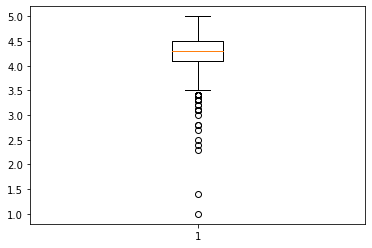

In [36]:
# Ok, finally ready to look at a boxplot to identify possible outliers
plt.boxplot(games_lower['Rating'])

In [37]:
# Since our question is "Who has the better game app market?" we are expecting to look at games that have the 
# highest ratings. Those games that fall below a rating of 3.5 are outliers and we'll get rid of them.
games_clean = games_lower[(games_lower['Rating']>3.5)]
games_clean

,Rating,App Name,Category,Num of Reviews,Num of Installs,Price,Content Rating,Genres
1634,4.5,roblox,game,4447388,100000000,0.0,everyone 10+,adventure;action & adventure
1635,4.5,subway surfers,game,27722264,1000000000,0.0,everyone 10+,arcade
1636,4.4,candy crush saga,game,22426677,500000000,0.0,everyone,casual
1637,4.7,solitaire,game,254258,10000000,0.0,everyone,card
1638,4.5,bubble shooter,game,148897,10000000,0.0,everyone,casual
...,...,...,...,...,...,...,...,...
10771,4.0,winter wonderland,game,1287,50000,0.0,everyone,word
10772,4.2,soccer clubs logo quiz,game,21661,1000000,0.0,everyone,trivia
10773,4.4,sid story,game,28510,500000,0.0,teen,card
10783,4.3,fatal raid - no.1 mobile fps,game,56496,1000000,0.0,teen,action


In [38]:
# We can see 42 observations were removed for being under a rating of 3.5
len(games_lower)-len(games_clean)

42

<function matplotlib.pyplot.show(close=None, block=None)>

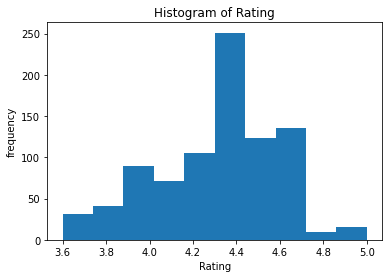

In [39]:
# Plot ratings on a histogram
plt.hist(games_clean['Rating'])
plt.title("Histogram of Rating")
plt.xlabel("Rating")
plt.ylabel("frequency")
plt.show

In [40]:
# Check out the summary statistics for Ratings
games_clean['Rating'].describe()

count    871.000000
mean       4.301033
std        0.280781
min        3.600000
25%        4.100000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rating, dtype: float64

In [41]:
# Decided to go back and rename the columns in prep to merge the dataframes
google_games = games_clean.rename(columns={"Rating": "google rating", "App Name": "game", 
                                           "Num of Reviews": "google num reviews", "Num of Installs": "google num installs", 
                                           "Price": "google price", "Content Rating": "content rating", 
                                           "Genres": "genres"})

In [42]:
# Drop Category column
google_games = google_games.drop(columns=['Category'])

In [43]:
google_games.to_csv('google_games.csv')

In [44]:
# Read in previously created CSVs that contain my three data source datasets
top_games = pd.read_csv('apps.csv') 
google_games = pd.read_csv('google_games.csv') 
game_deals = pd.read_csv('game_deals.csv')

In [45]:
# An Unnamed column showed up in all my csv's, not sure why.
top_games.head()

,Unnamed: 0,rank,product app,total revenue,date of release,owned by,type of niche
0,0,1,charger demolisher,8379000000,"june 14, 2015",mixi,physics / rpg / puzzle
1,1,2,linebacker crush,7410200000,"march 5, 2019",tencent games,moba
2,2,3,round robbin,7692000000,"april 25, 2018",gungho online entertainment,puzzle / rpg
3,3,4,sofi production,7540000000,"october 10, 2018",supercell (tencent),strategy
4,4,5,get outta here,6910000000,"september 28, 2020",king (activision blizzard),puzzle


In [46]:
# Remove the Unnamed columns
top_games = top_games.drop(columns=['Unnamed: 0'])
google_games = google_games.drop(columns=['Unnamed: 0'])
game_deals = game_deals.drop(columns=['Unnamed: 0'])

In [63]:
top_games.head()

,rank,product app,total revenue,date of release,owned by,type of niche
0,1,charger demolisher,8379000000,"june 14, 2015",mixi,physics / rpg / puzzle
1,2,linebacker crush,7410200000,"march 5, 2019",tencent games,moba
2,3,round robbin,7692000000,"april 25, 2018",gungho online entertainment,puzzle / rpg
3,4,sofi production,7540000000,"october 10, 2018",supercell (tencent),strategy
4,5,get outta here,6910000000,"september 28, 2020",king (activision blizzard),puzzle


In [67]:
top_games = top_games.rename(columns={"product app": "game"})

In [68]:
google_games.head()

,google rating,game,google num reviews,google num installs,google price,content rating,genres
0,4.5,roblox,4447388,100000000,0.0,everyone 10+,adventure;action & adventure
1,4.5,subway surfers,27722264,1000000000,0.0,everyone 10+,arcade
2,4.4,candy crush saga,22426677,500000000,0.0,everyone,casual
3,4.7,solitaire,254258,10000000,0.0,everyone,card
4,4.5,bubble shooter,148897,10000000,0.0,everyone,casual


In [69]:
game_deals.head()

,game,cheapshark id,sale price,reg price,percent savings,critic score,rating disposition,steam rating,steam num reviews,deal rating
0,gods will fall,223382,0.00,24.99,100,70,mixed,48,33,10.0
1,tank warfare: tunisia 1943 complete edition,195526,5.54,73.90,93,0,NaN,0,0,10.0
2,jump force - deluxe edition,195192,9.89,89.99,89,0,NaN,0,0,10.0
3,one piece burning blood gold edition,157072,11.24,74.99,85,0,NaN,0,0,10.0
4,one punch man: a hero nobody knows deluxe edition,210040,12.79,79.99,84,0,NaN,0,0,10.0


In [70]:
# Create the database that I want to store my tables in
conn = sqlite3.connect('mobileapps.db')
c = conn.cursor()

In [71]:
# Create a table for the top 50 game data
c.execute('CREATE TABLE top_games2 (rank, game, total_revenue, release_date, publisher, genres)')
conn.commit()

In [72]:
# Create a table for the google playstore game data
c.execute('CREATE TABLE google3_games (google_rating, game, google_num_reviews, google_num_installs, google_price, content_rating, genres)')
conn.commit()

In [73]:
# Create a table for the game sale data
c.execute('CREATE TABLE game3_deals (game, cheapshark_id, sale_price, reg_price, percent_savings, critic_score, rating_disposition, steam_rating, steam_num_reviews, deal_rating)')
conn.commit()

In [74]:
# Load the pandas dataframe data into the corresponding SQL tables
top_games.to_sql('top_games2', conn, if_exists='replace', index = False)
google_games.to_sql('google3_games', conn, if_exists='replace', index = False)
game_deals.to_sql('game3_deals', conn, if_exists='replace', index = False)

C:\Users\harol\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [75]:
# Close the database after inserting tables and data
conn.close()

In [76]:
# Create a query for each of the tables in sqlite3, just to make sure that they were loaded correctly
with sqlite3.connect("mobileapps.db") as conn:
    cursor = conn.cursor()
    rows = cursor.execute('SELECT * FROM top_games2 LIMIT 5')
    for row in rows:
        print(row)

(1, 'charger demolisher', 8379000000, 'june 14, 2015', 'mixi', 'physics / rpg / puzzle')
(2, 'linebacker crush', 7410200000, 'march 5, 2019', 'tencent games', 'moba')
(3, 'round robbin', 7692000000, 'april 25, 2018', 'gungho online entertainment', 'puzzle / rpg')
(4, 'sofi production', 7540000000, 'october 10, 2018', 'supercell (tencent)', 'strategy')
(5, 'get outta here', 6910000000, 'september 28, 2020', 'king (activision blizzard)', 'puzzle')


In [77]:
with sqlite3.connect("mobileapps.db") as conn:
    cursor = conn.cursor()
    rows = cursor.execute('SELECT * FROM google3_games LIMIT 5')
    for row in rows:
        print(row)

(4.5, 'roblox', 4447388, 100000000, 0.0, 'everyone 10+', 'adventure;action & adventure')
(4.5, 'subway surfers', 27722264, 1000000000, 0.0, 'everyone 10+', 'arcade')
(4.4, 'candy crush saga', 22426677, 500000000, 0.0, 'everyone', 'casual')
(4.7, 'solitaire', 254258, 10000000, 0.0, 'everyone', 'card')
(4.5, 'bubble shooter', 148897, 10000000, 0.0, 'everyone', 'casual')


In [78]:
with sqlite3.connect("mobileapps.db") as conn:
    cursor = conn.cursor()
    rows = cursor.execute('SELECT * FROM game3_deals LIMIT 5')
    for row in rows:
        print(row)

('gods will fall', 223382, 0.0, 24.99, 100, 70, 'mixed', 48, 33, 10.0)
('tank warfare: tunisia 1943 complete edition', 195526, 5.54, 73.9, 93, 0, None, 0, 0, 10.0)
('jump force - deluxe edition', 195192, 9.89, 89.99, 89, 0, None, 0, 0, 10.0)
('one piece burning blood gold edition', 157072, 11.24, 74.99, 85, 0, None, 0, 0, 10.0)
('one punch man: a hero nobody knows deluxe edition', 210040, 12.79, 79.99, 84, 0, None, 0, 0, 10.0)


In [79]:
con = sqlite3.connect("mobileapps.db")
df1 = pd.read_sql_query("SELECT * FROM top_games2", con)
df2 = pd.read_sql_query("SELECT * FROM google3_games", con)
df3 = pd.read_sql_query("SELECT * FROM game3_deals", con)
con.close()

In [80]:
# Now I will use python to join my 3 dataframes
final_df = df1.merge(df2,on='game', how='outer').merge(df3,on='game', how='outer')

In [81]:
final_df.head()

,rank,game,total revenue,date of release,owned by,type of niche,google rating,google num reviews,google num installs,google price,...,genres,cheapshark id,sale price,reg price,percent savings,critic score,rating disposition,steam rating,steam num reviews,deal rating
0,1.0,charger demolisher,8.379000e+09,"june 14, 2015",mixi,physics / rpg / puzzle,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,linebacker crush,7.410200e+09,"march 5, 2019",tencent games,moba,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,round robbin,7.692000e+09,"april 25, 2018",gungho online entertainment,puzzle / rpg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,sofi production,7.540000e+09,"october 10, 2018",supercell (tencent),strategy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,get outta here,6.910000e+09,"september 28, 2020",king (activision blizzard),puzzle,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizations

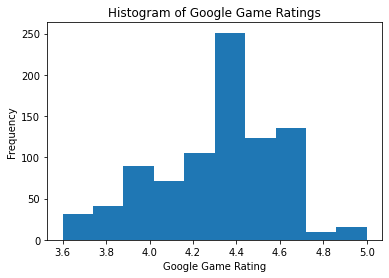

<Figure size 432x288 with 0 Axes>

In [83]:
# Plot histogram of google game rating
plt.hist(df2['google rating'])
plt.title("Histogram of Google Game Ratings")
plt.xlabel("Google Game Rating")
plt.ylabel("Frequency")
plt.show()
plt.savefig("Histogram_Ratings.pdf")

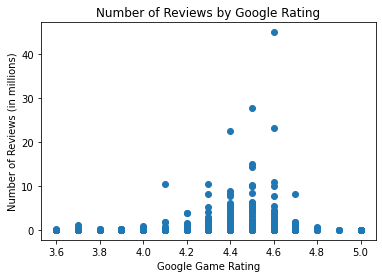

<Figure size 432x288 with 0 Axes>

In [84]:
# Scatterplot of the number of reviews on games by the game rating
plt.scatter(df2['google rating'], df2['google num reviews'] / 1000000)
plt.title("Number of Reviews by Google Rating")
plt.xlabel("Google Game Rating")
plt.ylabel("Number of Reviews (in millions)")
plt.show()
plt.savefig("Scatterplot Reviews by Ratings.pdf")

In [88]:
# I want to look at the worldwide revenue by the number of google installs, so I'm going to divide installs by millions
# and revenue by billions to create new variables that will look better in the plot
inner_df['revenue_in_billions'] = inner_df['total revenue'] / 1000000000
inner_df['installs_in_millions'] = inner_df['google num installs'] / 1000000

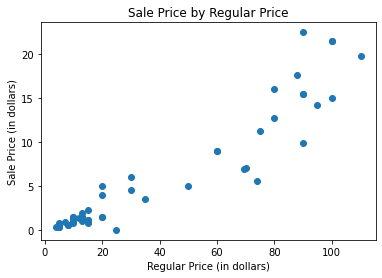

<Figure size 432x288 with 0 Axes>

In [90]:
plt.scatter(df3['reg price'], df3['sale price'])
plt.title("Sale Price by Regular Price")
plt.xlabel("Regular Price (in dollars)")
plt.ylabel("Sale Price (in dollars)")
plt.show()
plt.savefig("Scatterplot Sale Price by Regular Price.pdf")